# Cat_Vs_Dog [Binary_classification]

###### Prepare dataset for training model:

### segrigating the file into different file

In [1]:
#dir="C:/Users/Downloads/dogs-vs-cats/train"
#filenames=os.listdir(dir)
#import shutil
#categories=[]
#for f_name in filenames:
    #print(f"{dir}/{f_name}")
#    category=f_name.split('.')[0]
#    if category=='dog':
#        shutil.move(f"{dir}/{f_name}","C:/Users/Downloads/cats_and_dogs_filtered/train/dog")
        
#    else:
#        shutil.move(f"{dir}/{f_name}","C:/Users/Downloads/cats_and_dogs_filtered/train/cat")


In [2]:
train_dir ="C:/Users/Manoj Negi/Downloads/cats_and_dogs_filtered/train/"
valid_dir= "C:/Users/Manoj Negi/Downloads/cats_and_dogs_filtered/validation/"


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### visulizing the images:


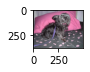

(375, 499, 3)


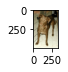

(499, 327, 3)


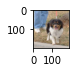

(199, 187, 3)


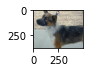

(375, 499, 3)


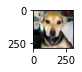

(287, 300, 3)


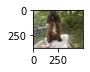

(376, 499, 3)


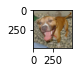

(488, 499, 3)


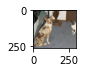

(264, 299, 3)


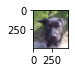

(500, 469, 3)


In [4]:
# plot first few images
for i in range(9):
    plt.subplot(5,3,1 + i)
    filename = train_dir +"dog/" + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.show()
    
    print(image.shape)

images are of different sizes
The photos will have to be reshaped prior to modeling so that all images have the same shape. This is often a small square image.


Smaller inputs mean a model that is faster to train, and typically this concern dominates the choice of image size. In this case, we will follow this approach and choose a fixed size of 200×200 pixels.

In [5]:
import pathlib
data_dir= pathlib.Path(train_dir)
class_label=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_label

array(['cat', 'dog'], dtype='<U3')

In [6]:
# create data generator -get all of the pixel values between 1 and 0   
train_datagen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                               shear_range = 0.2,
                                                               zoom_range = 0.2,
                                                               horizontal_flip = True)

valid_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                             shear_range = 0.2,
                                                               zoom_range = 0.2,
                                                               horizontal_flip = True)


##NOTE: we also custom the other parameters

In [7]:
# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             shuffle=True,
                                             target_size=(150,150),
                                             class_mode='binary',
                                             batch_size=32)

valid_data=valid_datagen.flow_from_directory(valid_dir,
                                             shuffle=True,
                                             target_size=(150,150),
                                             class_mode='binary',
                                             batch_size=32,
                                             )

Found 13856 images belonging to 2 classes.
Found 11144 images belonging to 2 classes.


In [8]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels),images.shape,labels.shape

(32, 32, (32, 150, 150, 3), (32,))

### Model layering :

In [9]:
model_01 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3), padding="same",activation="relu",kernel_initializer='he_uniform',input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),padding="same",kernel_initializer='he_uniform',activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),padding="same",kernel_initializer='he_uniform',activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),padding="same",kernel_initializer='he_uniform',activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),padding="same",kernel_initializer='he_uniform',activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
    
])

#tf.keras.utils.plot_model( model_0,show_shapes=True,show_dtype=True,show_layer_names=True,dpi=96,show_layer_activations=True,)
model_01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

In [10]:

# Create a function to implement a ModelCheckpoint callback with a specific filename 
save_model= tf.keras.callbacks.ModelCheckpoint(filepath=("model_with_01.weights.best.hdf5"), # create filepath to save model
                                            verbose=2, # only output a limited amount of text
                                            save_best_only=True)


# Create a function to implement a Earlystop callback with loss monitor)
Early_stop=tf.keras.callbacks.EarlyStopping( monitor='val_loss',
                                             patience=10,
                                            verbose=2)
callbacks=[save_model,Early_stop]

opt=tf.keras.optimizers.experimental.SGD(learning_rate=0.01,momentum=0.9)
model_01.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# fitting the model:
history_01=model_01.fit(train_data,
                  validation_data=valid_data,
                  validation_steps=int(len(valid_data)),
                  steps_per_epoch=int(len(train_data)),
                  batch_size=32,
                  epochs=20,
                  callbacks=[Early_stop,callbacks])

Epoch 1/20
433/433 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.6260
Epoch 1: val_loss improved from inf to 0.58920, saving model to model_with_01.weights.best.hdf5
433/433 [==============================] - 560s 1s/step - loss: 0.6396 - accuracy: 0.6260 - val_loss: 0.5892 - val_accuracy: 0.6853
Epoch 2/20


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


433/433 [==============================] - ETA: 0s - loss: 0.5629 - accuracy: 0.7089
Epoch 2: val_loss improved from 0.58920 to 0.52319, saving model to model_with_01.weights.best.hdf5
433/433 [==============================] - 552s 1s/step - loss: 0.5629 - accuracy: 0.7089 - val_loss: 0.5232 - val_accuracy: 0.7484
Epoch 3/20
433/433 [==============================] - ETA: 0s - loss: 0.5020 - accuracy: 0.7517
Epoch 3: val_loss improved from 0.52319 to 0.50978, saving model to model_with_01.weights.best.hdf5
433/433 [==============================] - 554s 1s/step - loss: 0.5020 - accuracy: 0.7517 - val_loss: 0.5098 - val_accuracy: 0.7404
Epoch 4/20
433/433 [==============================] - ETA: 0s - loss: 0.4653 - accuracy: 0.7790
Epoch 4: val_loss improved from 0.50978 to 0.47301, saving model to model_with_01.weights.best.hdf5
433/433 [==============================] - 558s 1s/step - loss: 0.4653 - accuracy: 0.7790 - val_loss: 0.4730 - val_accuracy: 0.7825
Epoch 5/20
433/433 [=======

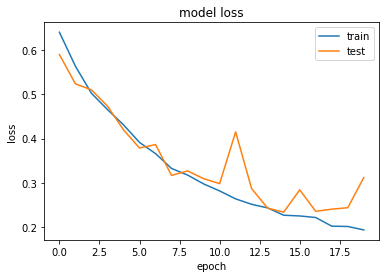

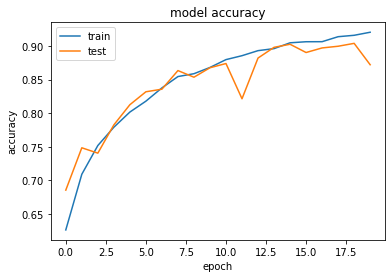

In [72]:
# summarize history for loss
plt.plot(history_01.history['loss'])
plt.plot(history_01.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


# summarize history for accuracy
plt.plot(history_01.history['accuracy'])
plt.plot(history_01.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evlauating model:

In [73]:
model_01.evaluate(valid_data)

349/349 [==============================] - 168s 480ms/step - loss: 0.3172 - accuracy: 0.8690


[0.3172096610069275, 0.8689877986907959]

### Loading the model

In [102]:
load_save_model = tf.keras.models.load_model('model_with_01.weights.best.hdf5')
load_save_model.evaluate(valid_data)

349/349 [==============================] - 182s 520ms/step - loss: 0.2373 - accuracy: 0.8974


[0.23733507096767426, 0.8974335789680481]

### Making some prediction:

In [103]:
import os
test_file="C:/Users/Manoj Negi/Downloads/test"
file_names=os.listdir(test_file)

filenames=[]
for i in file_names:
    filenames.append(os.path.join(test_file,i))


In [104]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=150):
    img = plt.imread(filename)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    img = img/255
    return img
    


1/1 [==============================] - 0s 65ms/step


C:\Users\Manoj Negi\AppData\Local\Temp\ipykernel_4952\4004510822.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


1/1 [==============================] - 0s 32ms/step


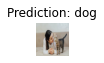

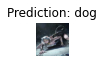

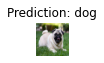

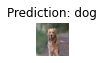

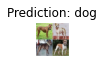

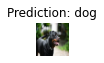

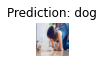

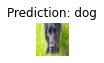

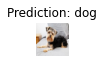

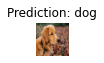

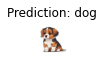

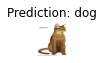

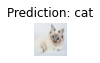

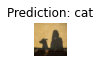

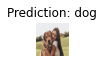

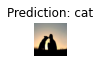

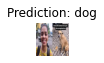

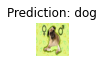

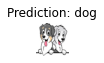

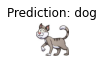

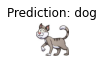

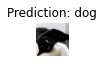

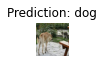

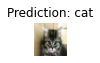

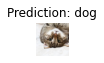

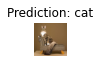

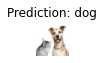

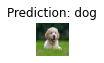

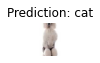

In [105]:

for i in range(len(filenames)):

    #calling global variable :"load_and_prep_image"
    image=load_and_prep_image(filename=filenames[i])

    ##expand the image dimension as the model expected shape=(None, 224, 224, 3):and we have(224, 224, 3):
    image_expanded=tf.expand_dims(image,axis=0)
    #print(f"\nShape after new dimension: {image_expanded.shape}")

    ## predicting the model:
    pred=load_save_model.predict(image_expanded)
    pred_class = class_label[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class

    fig = plt.figure()
    ax1 = fig.add_subplot(6,5,1+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([]);
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.tight_layout();

In [ ]:
# model accuracy accuracy is 89%

